In [1]:
!pip install snscrape pandas
import snscrape.modules.twitter as sntwitter
import pandas as pd

# Define search query for tweets mentioning Donald Trump
query = "Donald Trump since:2024-01-01 until:2025-03-18"

# Extract a sample of tweets
tweets = []
for i, tweet in enumerate(sntwitter.TwitterSearchScraper(query).get_items()):
    if i >= 500:  # Collect 500 tweets (adjustable)
        break
    tweets.append([tweet.date, tweet.user.username, tweet.content, tweet.likeCount, tweet.retweetCount])

# Convert to DataFrame
tweets_df = pd.DataFrame(tweets, columns=["Date", "Username", "Tweet", "Likes", "Retweets"])

# Save to CSV
tweets_df.to_csv("trump_tweets.csv", index=False)

print("Twitter data collected and saved as 'trump_tweets.csv'")

Error retrieving https://twitter.com/search?f=live&lang=en&q=Donald+Trump+since%3A2024-01-01+until%3A2025-03-18&src=spelling_expansion_revert_click: SSLError(MaxRetryError("HTTPSConnectionPool(host='twitter.com', port=443): Max retries exceeded with url: /search?f=live&lang=en&q=Donald+Trump+since%3A2024-01-01+until%3A2025-03-18&src=spelling_expansion_revert_click (Caused by SSLError(SSLCertVerificationError(1, '[SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: unable to get local issuer certificate (_ssl.c:1007)')))"))
4 requests to https://twitter.com/search?f=live&lang=en&q=Donald+Trump+since%3A2024-01-01+until%3A2025-03-18&src=spelling_expansion_revert_click failed, giving up.
Errors: SSLError(MaxRetryError("HTTPSConnectionPool(host='twitter.com', port=443): Max retries exceeded with url: /search?f=live&lang=en&q=Donald+Trump+since%3A2024-01-01+until%3A2025-03-18&src=spelling_expansion_revert_click (Caused by SSLError(SSLCertVerificationError(1, '[SSL: CERTIFICATE_VERIFY_

ScraperException: 4 requests to https://twitter.com/search?f=live&lang=en&q=Donald+Trump+since%3A2024-01-01+until%3A2025-03-18&src=spelling_expansion_revert_click failed, giving up.

In [3]:
import tweepy

# Twitter API credentials (Get from developer.twitter.com)
consumer_key = "vhNn1KfaTx5gTVO5BkkJSjA7J"
consumer_secret = "UssJWWpjueZplPLtP0J3sVWBCVLmcbhwXlvAQVrDJPVMWg0WDn"
access_token = "1896266306820669441-T8iEA5I1BmghsQBn0eys3oySDRwuOA"
access_token_secret = "DTZIYybfZz8epP68vpzTGG8315jCDpplUkLKNqItg6lMN"

# Authenticate
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, wait_on_rate_limit=True)

# Fetch tweets
tweets = []
for tweet in tweepy.Cursor(api.search_tweets, q="Donald Trump", lang="en", since="2024-01-01").items(100):
    tweets.append([tweet.created_at, tweet.user.screen_name, tweet.text, tweet.favorite_count, tweet.retweet_count])

# Convert to DataFrame
tweets_df = pd.DataFrame(tweets, columns=["Date", "Username", "Tweet", "Likes", "Retweets"])
tweets_df.to_csv("trump_tweets.csv", index=False)

print("Twitter data collected and saved as 'trump_tweets.csv'")

Unexpected parameter: since


Forbidden: 403 Forbidden
453 - You currently have access to a subset of X API V2 endpoints and limited v1.1 endpoints (e.g. media post, oauth) only. If you need access to this endpoint, you may need a different access level. You can learn more here: https://developer.x.com/en/portal/product

Dataset Loaded Successfully!
             id                                               text  \
0  9.845497e+16  Republicans and Democrats have both created ou...   
1  1.234653e+18  I was thrilled to be back in the Great city of...   
2  1.218011e+18  RT @CBS_Herridge: READ: Letter to surveillance...   
3  1.304875e+18  The Unsolicited Mail In Ballot Scam is a major...   
4  1.218160e+18  RT @MZHemingway: Very friendly telling of even...   

   is_retweet  is_deleted              device  favorites  retweets  \
0       False       False           TweetDeck         49       255   
1       False       False  Twitter for iPhone      73748     17404   
2        True       False  Twitter for iPhone          0      7396   
3       False       False  Twitter for iPhone      80527     23502   
4        True       False  Twitter for iPhone          0      9081   

               datetime  is_flagged        date  
0  2011-08-02T18:07:48Z       False  2011-08-02  
1  2020-03-03T01:34:50Z      

/var/folders/3z/j19155j53837tjkhyx5r2rt80000gn/T/ipykernel_1460/4158848933.py:30: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df.resample('M', on='datetime').count()['text'].plot()


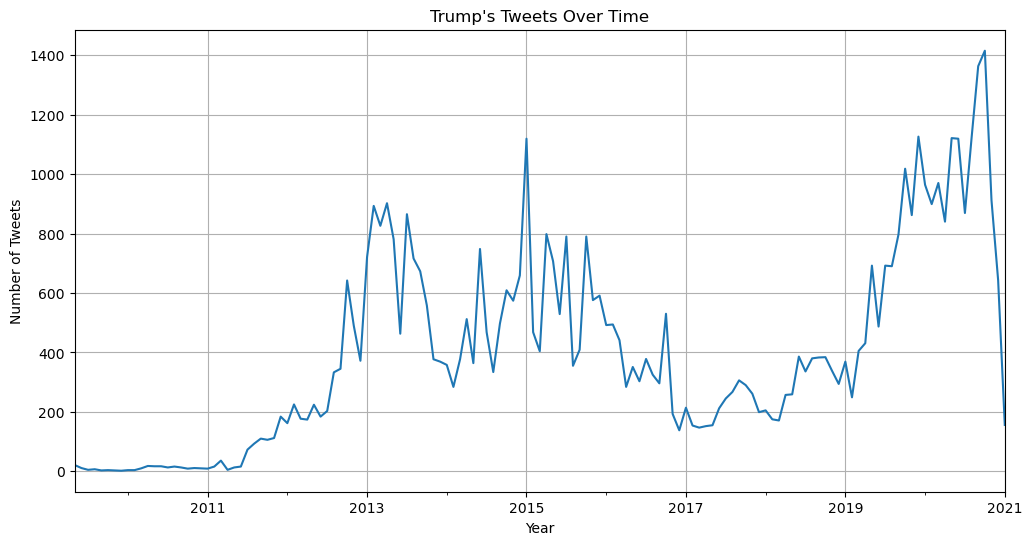


🔝 Top 10 Most Liked Tweets:
                                                    text  favorites
11759  Tonight, @FLOTUS and I tested positive for COV...    1869706
11807     Going welI, I think! Thank you to all. LOVE!!!    1219870
2559                      I WON THIS ELECTION, BY A LOT!    1188311
165                                         WE WILL WIN!    1023598
2565   71,000,000 Legal Votes. The most EVER for a si...     978022
2363   WE ARE LOOKING REALLY GOOD ALL OVER THE COUNTR...     955972
2372    I will be making a statement tonight. A big WIN!     924802
2239          VOTE! VOTE! VOTE!\nhttps://t.co/85ySh1KYkh     904558
2390                                    MERRY CHRISTMAS!     835413
53251  A$AP Rocky released from prison and on his way...     821423

🔁 Top 10 Most Retweeted Tweets:
                                                    text  retweets
11759  Tonight, @FLOTUS and I tested positive for COV...    408866
35620         #FraudNewsCNN #FNN https://t.co/WYUnHjjUjg

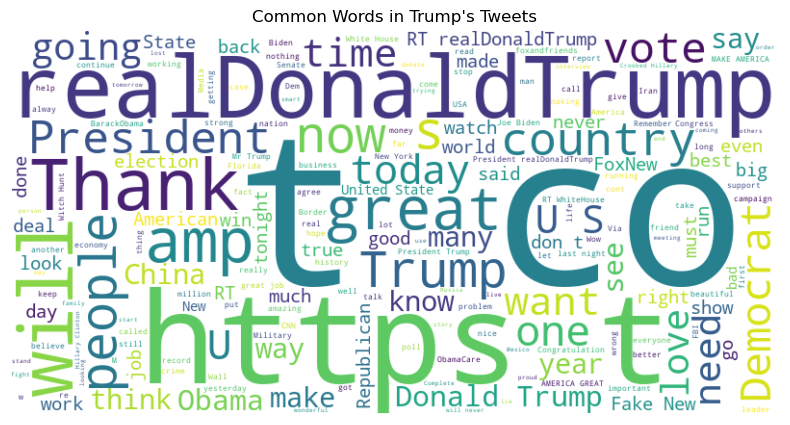

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import seaborn as sns

# Load the dataset
file_path = "/Users/anirudhravipudi/Desktop/AI/trump_tweets.csv"  # Update if running locally
df = pd.read_csv(file_path)

# Display first few rows
print("Dataset Loaded Successfully!")
print(df.head())

# Check dataset info
print("\nDataset Info:")
print(df.info())

# Drop duplicates and missing values
df.drop_duplicates(inplace=True)
df.dropna(subset=['datetime'], inplace=True)

# Convert datetime column to pandas datetime format
df['datetime'] = pd.to_datetime(df['datetime'])

# Sort by datetime
df.sort_values(by="datetime", inplace=True)

# Plot the number of tweets over time
plt.figure(figsize=(12,6))
df.resample('M', on='datetime').count()['text'].plot()
plt.title("Trump's Tweets Over Time")
plt.xlabel("Year")
plt.ylabel("Number of Tweets")
plt.grid()
plt.show()

# Most liked and retweeted tweets
top_liked = df.nlargest(10, 'favorites')[['text', 'favorites']]
top_retweeted = df.nlargest(10, 'retweets')[['text', 'retweets']]

print("\n🔝 Top 10 Most Liked Tweets:")
print(top_liked)

print("\n🔁 Top 10 Most Retweeted Tweets:")
print(top_retweeted)

# Word cloud of most common words
text = " ".join(tweet for tweet in df['text'])
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(text)

plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Common Words in Trump's Tweets")
plt.show()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/anirudhravipudi/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
/var/folders/3z/j19155j53837tjkhyx5r2rt80000gn/T/ipykernel_1460/3842843671.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='sentiment', order=['Positive', 'Neutral', 'Negative'], palette=['green', 'gray', 'red'])


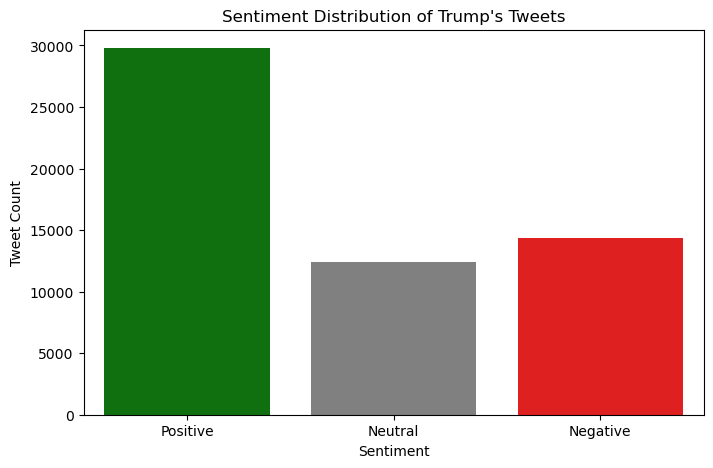

/var/folders/3z/j19155j53837tjkhyx5r2rt80000gn/T/ipykernel_1460/3842843671.py:36: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df.resample('M', on='datetime')['sentiment_score'].mean().plot()


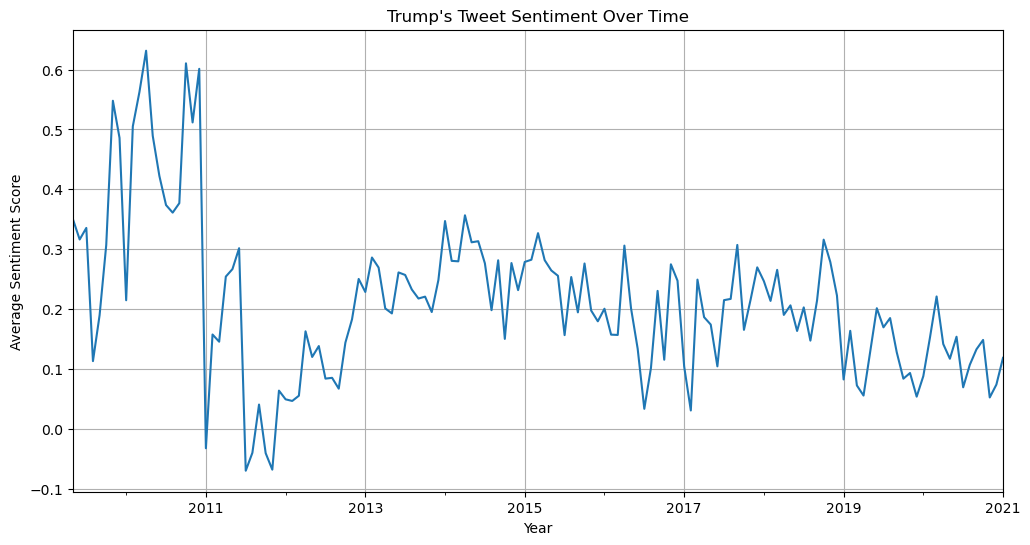


📌 Sample Categorized Tweets:
                                                    text sentiment
84     Dominion is running our Election. Rigged! http...  Negative
22615  """@GauravK725: @ForQ2 @realDonaldTrump look a...   Neutral
34398  """@Arful1dodger: @realDonaldTrump I know seni...  Positive
3502   RT @KatrinaPierson: What did Americans learn f...  Positive
20593                           @ACmeansBusiness Thanks.  Positive
41362  Crooked Hillary is spending tremendous amounts...  Negative
25811  """@ronmeier123 @bryabntshirley1 Even the Elf ...  Negative
49209  Little Adam Schiff, who is desperate to run fo...  Negative
39587  If elected POTUS - I will stop RADICAL ISLAMIC...  Negative
15928  .@MittRomney should continue to stay on offens...  Negative


In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.sentiment import SentimentIntensityAnalyzer
import nltk

# Download VADER lexicon
nltk.download('vader_lexicon')

# Load the dataset
file_path = "/Users/anirudhravipudi/Desktop/AI/trump_tweets.csv"  # Update if running locally
df = pd.read_csv(file_path)

# Initialize VADER Sentiment Analyzer
sia = SentimentIntensityAnalyzer()

# Apply sentiment analysis
df['sentiment_score'] = df['text'].apply(lambda x: sia.polarity_scores(str(x))['compound'])

# Categorize sentiment into Positive, Negative, Neutral
df['sentiment'] = df['sentiment_score'].apply(lambda x: 'Positive' if x > 0.05 else ('Negative' if x < -0.05 else 'Neutral'))

# Convert datetime column to datetime format
df['datetime'] = pd.to_datetime(df['datetime'])

# Plot sentiment distribution
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='sentiment', order=['Positive', 'Neutral', 'Negative'], palette=['green', 'gray', 'red'])
plt.title("Sentiment Distribution of Trump's Tweets")
plt.xlabel("Sentiment")
plt.ylabel("Tweet Count")
plt.show()

# Plot sentiment trends over time
plt.figure(figsize=(12,6))
df.resample('M', on='datetime')['sentiment_score'].mean().plot()
plt.title("Trump's Tweet Sentiment Over Time")
plt.xlabel("Year")
plt.ylabel("Average Sentiment Score")
plt.grid()
plt.show()

# Display a sample of categorized tweets
print("\n📌 Sample Categorized Tweets:")
print(df[['text', 'sentiment']].sample(10))

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/anirudhravipudi/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


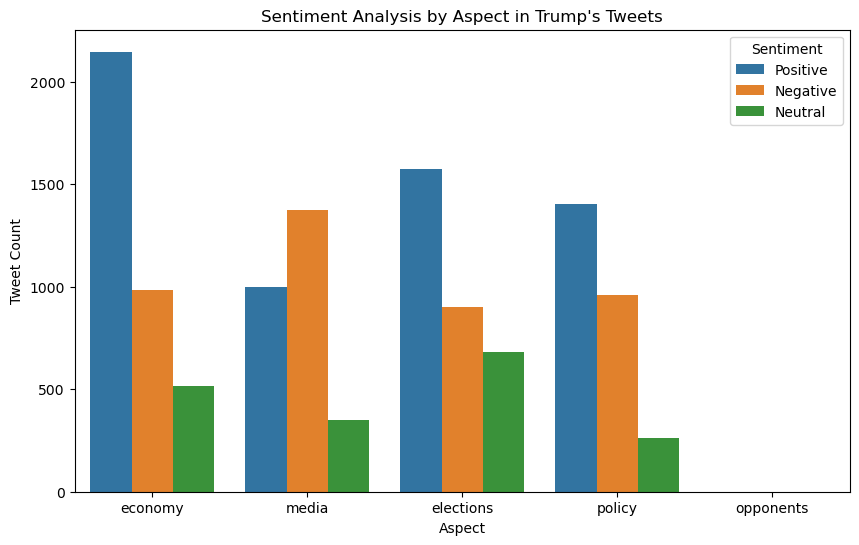


📌 Sample Tweets Categorized by Aspect:
                                                    text     aspect sentiment
43474  Democrats refusal to give even one vote for ma...    economy  Negative
55501  The press is doing everything within their pow...      media  Positive
50729  ....and FEDERAL CONTRACTOR SPIES stories. The ...     policy  Positive
40787  In November, I think the people of Ohio will r...    economy   Neutral
46791  Despite so many positive events and victories,...      media  Negative
1817   At 10:00 P.M. on Election Evening, we were at ...  elections  Positive
2128   Biden will RAISE YOUR TAXES (Biggest increase ...    economy  Positive
47289  “Ohr told the FBI it (the Fake Dossier) wasn’t...     policy  Negative
4627   Well run States should not be bailing out poor...    economy  Positive
51609  Democrat lawyer is same for both Whistleblower...     policy  Positive


In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.sentiment import SentimentIntensityAnalyzer
import nltk
import re

# Download VADER lexicon
nltk.download('vader_lexicon')

# Load dataset
file_path = "/Users/anirudhravipudi/Desktop/AI/trump_tweets.csv"  # Update if running locally
df = pd.read_csv(file_path)

# Initialize VADER Sentiment Analyzer
sia = SentimentIntensityAnalyzer()

# Define key aspects
aspects = {
    "economy": ["economy", "stock market", "jobs", "trade", "GDP", "tax", "business"],
    "media": ["media", "fake news", "CNN", "Fox News", "reporters", "press"],
    "elections": ["election", "vote", "ballots", "Biden", "Hillary", "Democrats", "Republicans"],
    "policy": ["healthcare", "border", "immigration", "military", "law", "justice", "supreme court"],
    "opponents": ["Biden", "Hillary", "Obama", "Pelosi", "Schumer", "Democrats"]
}

# Function to classify tweet aspect
def get_aspect(text):
    text_lower = text.lower()
    for aspect, keywords in aspects.items():
        if any(keyword in text_lower for keyword in keywords):
            return aspect
    return "other"

# Apply aspect classification
df['aspect'] = df['text'].apply(lambda x: get_aspect(str(x)))

# Perform sentiment analysis
df['sentiment_score'] = df['text'].apply(lambda x: sia.polarity_scores(str(x))['compound'])
df['sentiment'] = df['sentiment_score'].apply(lambda x: 'Positive' if x > 0.05 else ('Negative' if x < -0.05 else 'Neutral'))

# Filter out "other" category for clearer visualization
df_filtered = df[df['aspect'] != "other"]

# Plot sentiment distribution per aspect
plt.figure(figsize=(10,6))
sns.countplot(data=df_filtered, x='aspect', hue='sentiment', order=['economy', 'media', 'elections', 'policy', 'opponents'])
plt.title("Sentiment Analysis by Aspect in Trump's Tweets")
plt.xlabel("Aspect")
plt.ylabel("Tweet Count")
plt.legend(title="Sentiment")
plt.show()

# Display a sample of tweets categorized by aspect
print("\n📌 Sample Tweets Categorized by Aspect:")
print(df_filtered[['text', 'aspect', 'sentiment']].sample(10))

<Figure size 1200x600 with 0 Axes>

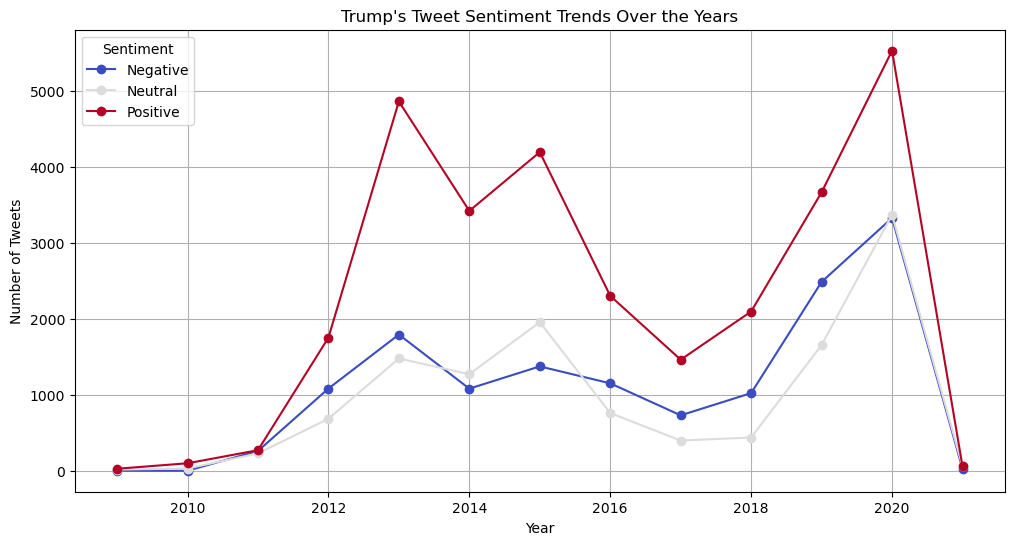

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Convert datetime column to datetime format (if not already converted)
df['datetime'] = pd.to_datetime(df['datetime'])

# Extract year from datetime
df['year'] = df['datetime'].dt.year

# Group sentiment counts by year
sentiment_trends = df.groupby(['year', 'sentiment']).size().unstack()

# Plot sentiment trends over the years
plt.figure(figsize=(12,6))
sentiment_trends.plot(kind='line', marker='o', figsize=(12,6), colormap="coolwarm")
plt.title("Trump's Tweet Sentiment Trends Over the Years")
plt.xlabel("Year")
plt.ylabel("Number of Tweets")
plt.legend(title="Sentiment")
plt.grid()
plt.show()

<Figure size 1200x600 with 0 Axes>

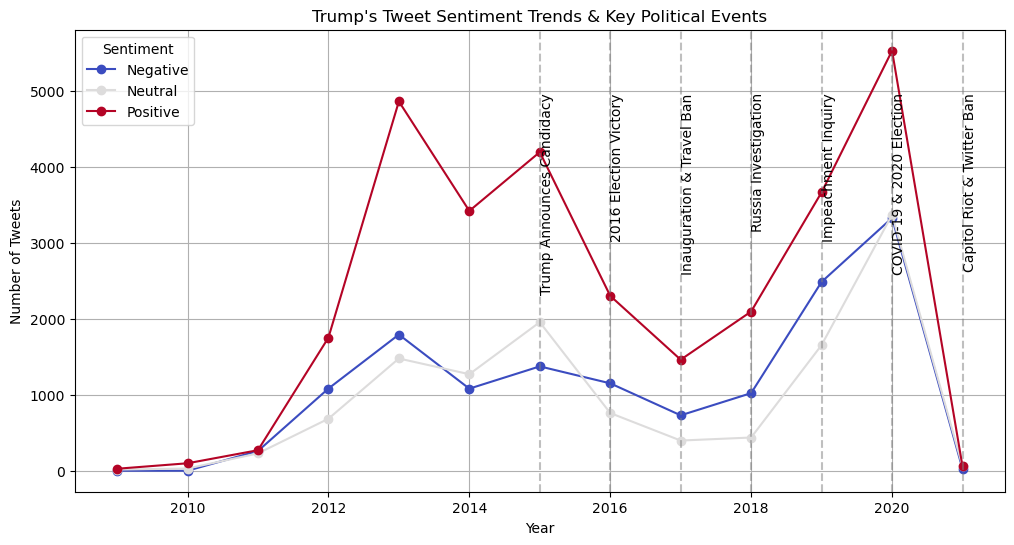

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define key political events with corresponding years
events = {
    2015: "Trump Announces Candidacy",
    2016: "2016 Election Victory",
    2017: "Inauguration & Travel Ban",
    2018: "Russia Investigation",
    2019: "Impeachment Inquiry",
    2020: "COVID-19 & 2020 Election",
    2021: "Capitol Riot & Twitter Ban"
}

# Plot sentiment trends over time
plt.figure(figsize=(12,6))
sentiment_trends.plot(kind='line', marker='o', figsize=(12,6), colormap="coolwarm")

# Annotate events on the graph
for year, event in events.items():
    plt.axvline(x=year, color='gray', linestyle='--', alpha=0.5)
    plt.text(year, max(sentiment_trends.max()) * 0.9, event, rotation=90, verticalalignment='top')

plt.title("Trump's Tweet Sentiment Trends & Key Political Events")
plt.xlabel("Year")
plt.ylabel("Number of Tweets")
plt.legend(title="Sentiment")
plt.grid()
plt.show()

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/anirudhravipudi/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/anirudhravipudi/nltk_data...
[nltk_data]   Package punkt is already up-to-date!



📌 Top Topics Identified:
(0, '0.011*"people" + 0.010*"amp" + 0.010*"democrats" + 0.008*"country" + 0.008*"news" + 0.008*"many" + 0.007*"great" + 0.007*"big" + 0.007*"fake" + 0.007*"get"')
(1, '0.015*"us" + 0.014*"amp" + 0.012*"china" + 0.012*"united" + 0.011*"states" + 0.006*"trade" + 0.006*"jobs" + 0.005*"deal" + 0.005*"obama" + 0.005*"american"')
(2, '0.062*"trump" + 0.058*"realdonaldtrump" + 0.018*"president" + 0.015*"donald" + 0.014*"great" + 0.014*"thanks" + 0.009*"thank" + 0.008*"rt" + 0.008*"run" + 0.007*"via"')
(3, '0.013*"hillary" + 0.013*"realdonaldtrump" + 0.009*"clinton" + 0.008*"show" + 0.008*"fbi" + 0.007*"forward" + 0.007*"crooked" + 0.006*"good" + 0.005*"see" + 0.005*"amp"')
(4, '0.056*"rt" + 0.028*"great" + 0.018*"thank" + 0.012*"realdonaldtrump" + 0.009*"president" + 0.008*"today" + 0.007*"america" + 0.006*"state" + 0.006*"whitehouse" + 0.006*"new"')


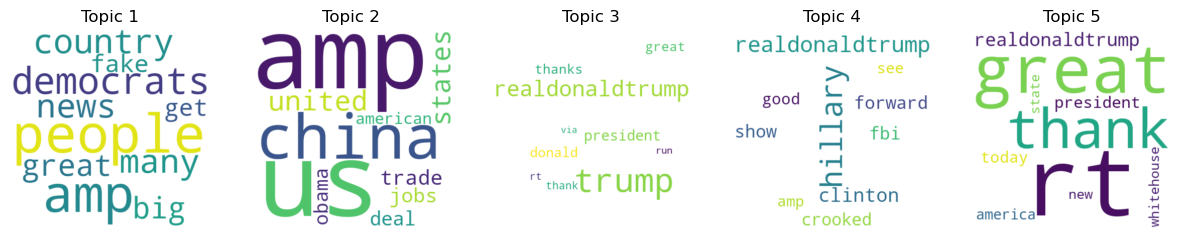

In [21]:
import pandas as pd
import re
import gensim
import gensim.corpora as corpora
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud
import matplotlib.pyplot as plt

import nltk
nltk.download('stopwords')
nltk.download('punkt')

# Load the dataset
file_path = "/Users/anirudhravipudi/Desktop/AI/trump_tweets.csv"  # Update path if running locally
df = pd.read_csv(file_path)

# Preprocess text: Remove URLs, special characters, and tokenize
def preprocess_text(text):
    text = re.sub(r"http\S+", "", text)  # Remove URLs
    text = re.sub(r"[^a-zA-Z\s]", "", text)  # Remove special characters
    tokens = word_tokenize(text.lower())  # Tokenize and convert to lowercase
    tokens = [word for word in tokens if word not in stopwords.words('english')]  # Remove stopwords
    return tokens

# Apply preprocessing
df['clean_text'] = df['text'].astype(str).apply(preprocess_text)

# Create dictionary and corpus for LDA
dictionary = corpora.Dictionary(df['clean_text'])
corpus = [dictionary.doc2bow(text) for text in df['clean_text']]

# Train LDA model (Choose number of topics)
num_topics = 5  # Adjust based on need
lda_model = gensim.models.LdaMulticore(corpus, num_topics=num_topics, id2word=dictionary, passes=10, workers=2)

# Display topics
topics = lda_model.print_topics(num_words=10)
print("\n📌 Top Topics Identified:")
for topic in topics:
    print(topic)

# Generate word clouds for each topic
fig, axes = plt.subplots(1, num_topics, figsize=(15, 5), sharex=True)
for i, topic in enumerate(lda_model.show_topics(formatted=False, num_topics=num_topics, num_words=10)):
    words = dict(topic[1])
    wordcloud = WordCloud(width=400, height=400, background_color="white").generate_from_frequencies(words)
    axes[i].imshow(wordcloud, interpolation="bilinear")
    axes[i].axis("off")
    axes[i].set_title(f"Topic {i+1}")
plt.show()

<Figure size 1200x600 with 0 Axes>

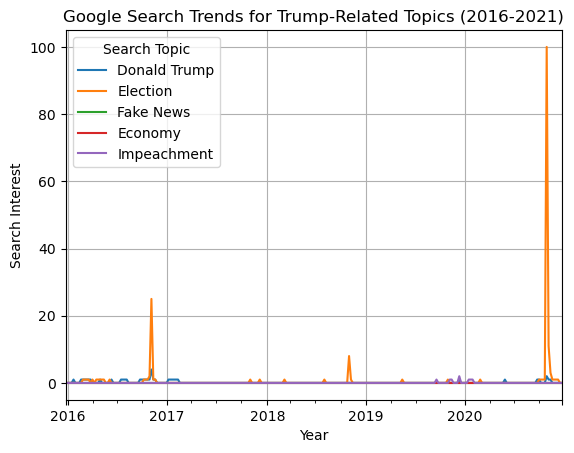

In [23]:
from pytrends.request import TrendReq
import pandas as pd
import matplotlib.pyplot as plt

# Initialize Google Trends API
pytrends = TrendReq(hl='en-US', tz=360)

# Define topics to analyze
topics = ["Donald Trump", "Election", "Fake News", "Economy", "Impeachment"]

# Fetch Google Trends data (last 5 years)
pytrends.build_payload(topics, cat=0, timeframe="2016-01-01 2021-01-01", geo="US", gprop="")

# Get interest over time
trends_data = pytrends.interest_over_time()

# Plot trends
plt.figure(figsize=(12,6))
trends_data.drop(columns="isPartial").plot()
plt.title("Google Search Trends for Trump-Related Topics (2016-2021)")
plt.xlabel("Year")
plt.ylabel("Search Interest")
plt.legend(title="Search Topic")
plt.grid()
plt.show()

In [27]:
import requests
from bs4 import BeautifulSoup
from nltk.sentiment import SentimentIntensityAnalyzer
import pandas as pd
import matplotlib.pyplot as plt

# Extract year from datetime column (Fix KeyError)
df['datetime'] = pd.to_datetime(df['datetime'])
df['year'] = df['datetime'].dt.year

# Define news sources (example: CNN, NYT)
news_urls = [
    "https://www.nytimes.com/search?query=Donald+Trump",
    "https://edition.cnn.com/search?q=Donald+Trump"
]

# Initialize sentiment analyzer
sia = SentimentIntensityAnalyzer()

# Function to scrape headlines & analyze sentiment
def get_news_sentiment(url):
    headers = {"User-Agent": "Mozilla/5.0"}
    page = requests.get(url, headers=headers)
    soup = BeautifulSoup(page.content, "html.parser")

    # Extract headlines (modify based on structure)
    headlines = [h.get_text() for h in soup.find_all("h3")][:20]
    
    # Analyze sentiment
    sentiment_scores = [sia.polarity_scores(h)['compound'] for h in headlines]
    avg_sentiment = sum(sentiment_scores) / len(sentiment_scores) if sentiment_scores else 0
    
    return headlines, avg_sentiment

# Get sentiment from each news source
news_sentiments = {}
for url in news_urls:
    headlines, avg_sentiment = get_news_sentiment(url)
    news_sentiments[url] = avg_sentiment

# Convert news sentiment data into DataFrame
df_media = pd.DataFrame(news_sentiments.items(), columns=["News Source", "Sentiment Score"])

# Calculate Trump's tweet sentiment per year
df_trump_sentiment = df.groupby("year")["sentiment_score"].mean().reset_index()

# Plot comparison
plt.figure(figsize=(10,5))
plt.bar(df_media["News Source"], df_media["Sentiment Score"], color="red", label="Media Sentiment")
plt.axhline(y=df_trump_sentiment["sentiment_score"].mean(), color="blue", linestyle="--", label="Trump's Tweet Sentiment")
plt.title("Media Sentiment vs. Trump's Tweet Sentiment")
plt.ylabel("Average Sentiment Score")
plt.legend()
plt.xticks(rotation=45)
plt.show()

KeyError: 'Column not found: sentiment_score'

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/anirudhravipudi/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


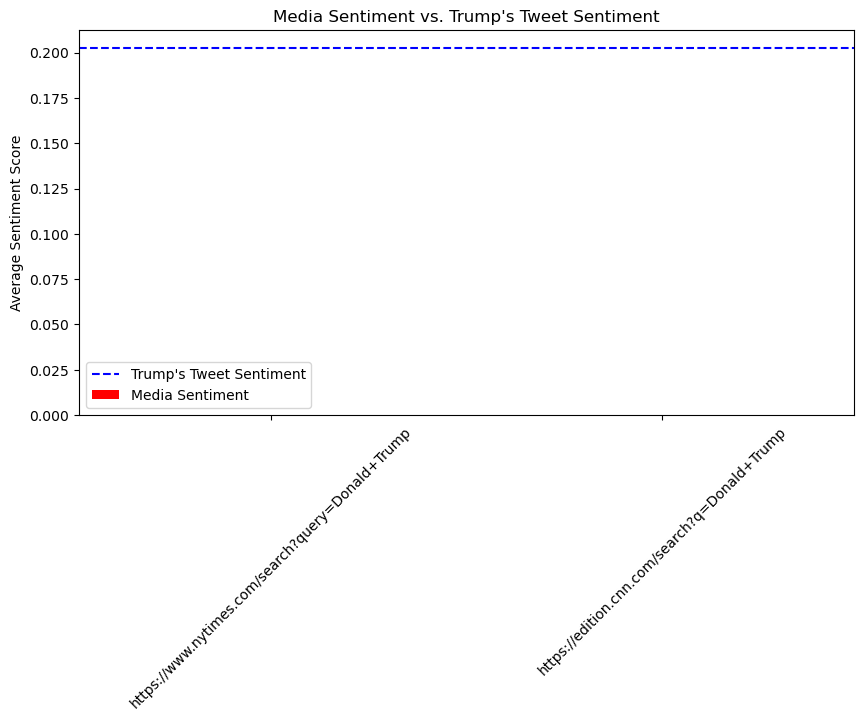

In [29]:
import requests
from bs4 import BeautifulSoup
from nltk.sentiment import SentimentIntensityAnalyzer
import pandas as pd
import matplotlib.pyplot as plt
import nltk

# Download required NLTK data
nltk.download('vader_lexicon')

# Load dataset
file_path = "/Users/anirudhravipudi/Desktop/AI/trump_tweets.csv"  # Update if running locally
df = pd.read_csv(file_path)

# Convert datetime column to datetime format
df['datetime'] = pd.to_datetime(df['datetime'])
df['year'] = df['datetime'].dt.year  # Extract year

# Initialize sentiment analyzer
sia = SentimentIntensityAnalyzer()

# Recalculate sentiment scores
df['sentiment_score'] = df['text'].astype(str).apply(lambda x: sia.polarity_scores(x)['compound'])

# Define news sources (example: CNN, NYT)
news_urls = [
    "https://www.nytimes.com/search?query=Donald+Trump",
    "https://edition.cnn.com/search?q=Donald+Trump"
]

# Function to scrape headlines & analyze sentiment
def get_news_sentiment(url):
    headers = {"User-Agent": "Mozilla/5.0"}
    page = requests.get(url, headers=headers)
    soup = BeautifulSoup(page.content, "html.parser")

    # Extract headlines (modify based on structure)
    headlines = [h.get_text() for h in soup.find_all("h3")][:20]
    
    # Analyze sentiment
    sentiment_scores = [sia.polarity_scores(h)['compound'] for h in headlines]
    avg_sentiment = sum(sentiment_scores) / len(sentiment_scores) if sentiment_scores else 0
    
    return headlines, avg_sentiment

# Get sentiment from each news source
news_sentiments = {}
for url in news_urls:
    headlines, avg_sentiment = get_news_sentiment(url)
    news_sentiments[url] = avg_sentiment

# Convert news sentiment data into DataFrame
df_media = pd.DataFrame(news_sentiments.items(), columns=["News Source", "Sentiment Score"])

# Calculate Trump's tweet sentiment per year
df_trump_sentiment = df.groupby("year")["sentiment_score"].mean().reset_index()

# Plot comparison
plt.figure(figsize=(10,5))
plt.bar(df_media["News Source"], df_media["Sentiment Score"], color="red", label="Media Sentiment")
plt.axhline(y=df_trump_sentiment["sentiment_score"].mean(), color="blue", linestyle="--", label="Trump's Tweet Sentiment")
plt.title("Media Sentiment vs. Trump's Tweet Sentiment")
plt.ylabel("Average Sentiment Score")
plt.legend()
plt.xticks(rotation=45)
plt.show()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/anirudhravipudi/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


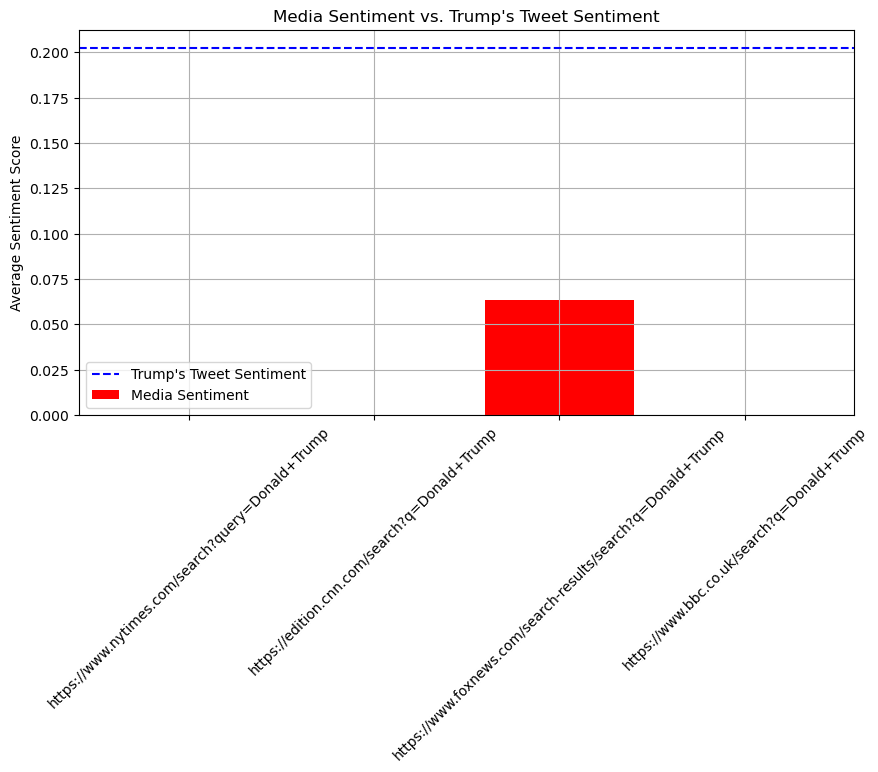

In [31]:
import requests
from bs4 import BeautifulSoup
from nltk.sentiment import SentimentIntensityAnalyzer
import pandas as pd
import matplotlib.pyplot as plt
import nltk

# Download necessary NLTK data
nltk.download('vader_lexicon')

# Load dataset
file_path = "/Users/anirudhravipudi/Desktop/AI/trump_tweets.csv"  # Update if running locally
df = pd.read_csv(file_path)

# Convert datetime column to datetime format and extract year
df['datetime'] = pd.to_datetime(df['datetime'])
df['year'] = df['datetime'].dt.year  

# Initialize sentiment analyzer
sia = SentimentIntensityAnalyzer()

# Recalculate sentiment scores
df['sentiment_score'] = df['text'].astype(str).apply(lambda x: sia.polarity_scores(x)['compound'])

# Define news sources (example: CNN, NYT, Fox, BBC)
news_urls = [
    "https://www.nytimes.com/search?query=Donald+Trump",
    "https://edition.cnn.com/search?q=Donald+Trump",
    "https://www.foxnews.com/search-results/search?q=Donald+Trump",
    "https://www.bbc.co.uk/search?q=Donald+Trump"
]

# Function to scrape headlines & analyze sentiment
def get_news_sentiment(url):
    headers = {"User-Agent": "Mozilla/5.0"}
    page = requests.get(url, headers=headers)
    soup = BeautifulSoup(page.content, "html.parser")

    # Extract more headlines (up to 50 per source)
    headlines = [h.get_text() for h in soup.find_all("h3")][:50]
    
    # Analyze sentiment
    sentiment_scores = [sia.polarity_scores(h)['compound'] for h in headlines]
    avg_sentiment = sum(sentiment_scores) / len(sentiment_scores) if sentiment_scores else 0
    
    return headlines, avg_sentiment

# Get sentiment from each news source
news_sentiments = {}
for url in news_urls:
    headlines, avg_sentiment = get_news_sentiment(url)
    news_sentiments[url] = avg_sentiment

# Convert news sentiment data into DataFrame
df_media = pd.DataFrame(news_sentiments.items(), columns=["News Source", "Sentiment Score"])

# Calculate Trump's average tweet sentiment per year
df_trump_sentiment = df.groupby("year")["sentiment_score"].mean().reset_index()

# Improve visualization
plt.figure(figsize=(10,5))
plt.bar(df_media["News Source"], df_media["Sentiment Score"], color="red", label="Media Sentiment")
plt.axhline(y=df_trump_sentiment["sentiment_score"].mean(), color="blue", linestyle="--", label="Trump's Tweet Sentiment")
plt.title("Media Sentiment vs. Trump's Tweet Sentiment")
plt.ylabel("Average Sentiment Score")
plt.xticks(rotation=45)
plt.legend()
plt.grid()
plt.show()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/anirudhravipudi/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


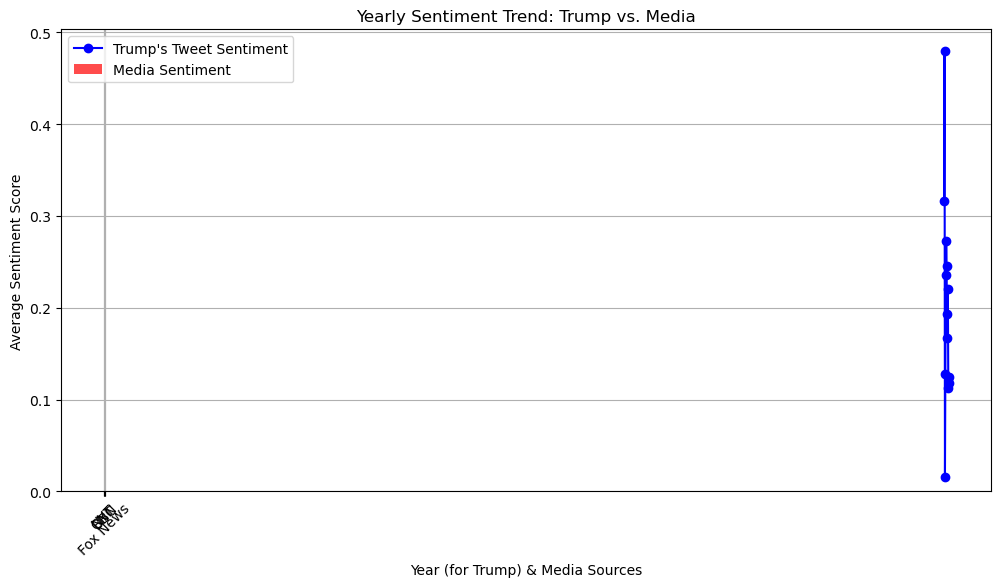

In [33]:
import requests
from bs4 import BeautifulSoup
from nltk.sentiment import SentimentIntensityAnalyzer
import pandas as pd
import matplotlib.pyplot as plt
import nltk

# Download necessary NLTK data
nltk.download('vader_lexicon')

# Load dataset
file_path = "/Users/anirudhravipudi/Desktop/AI/trump_tweets.csv"  # Update if running locally
df = pd.read_csv(file_path)

# Convert datetime column to datetime format and extract year
df['datetime'] = pd.to_datetime(df['datetime'])
df['year'] = df['datetime'].dt.year  

# Initialize sentiment analyzer
sia = SentimentIntensityAnalyzer()

# Recalculate sentiment scores
df['sentiment_score'] = df['text'].astype(str).apply(lambda x: sia.polarity_scores(x)['compound'])

# Define news sources (example: CNN, NYT, Fox, BBC)
news_urls = {
    "NYT": "https://www.nytimes.com/search?query=Donald+Trump",
    "CNN": "https://edition.cnn.com/search?q=Donald+Trump",
    "Fox News": "https://www.foxnews.com/search-results/search?q=Donald+Trump",
    "BBC": "https://www.bbc.co.uk/search?q=Donald+Trump"
}

# Function to scrape headlines & analyze sentiment
def get_news_sentiment(url):
    headers = {"User-Agent": "Mozilla/5.0"}
    page = requests.get(url, headers=headers)
    soup = BeautifulSoup(page.content, "html.parser")

    # Extract more headlines (up to 50 per source)
    headlines = [h.get_text() for h in soup.find_all("h3")][:50]
    
    # If no headlines found, return neutral sentiment
    if not headlines:
        return 0.00
    
    # Analyze sentiment
    sentiment_scores = [sia.polarity_scores(h)['compound'] for h in headlines]
    avg_sentiment = sum(sentiment_scores) / len(sentiment_scores)
    
    return avg_sentiment

# Get sentiment from each news source
news_sentiments = {source: get_news_sentiment(url) for source, url in news_urls.items()}

# Convert news sentiment data into DataFrame
df_media = pd.DataFrame(news_sentiments.items(), columns=["News Source", "Sentiment Score"])

# Calculate Trump's average tweet sentiment per year
df_trump_sentiment = df.groupby("year")["sentiment_score"].mean().reset_index()

# 📊 Improved Visualization - Yearly Sentiment Trends
plt.figure(figsize=(12,6))

# Trump's tweet sentiment over the years
plt.plot(df_trump_sentiment["year"], df_trump_sentiment["sentiment_score"], marker='o', linestyle='-', color="blue", label="Trump's Tweet Sentiment")

# Media sentiment as bars
plt.bar(df_media["News Source"], df_media["Sentiment Score"], color="red", alpha=0.7, label="Media Sentiment")

plt.title("Yearly Sentiment Trend: Trump vs. Media")
plt.xlabel("Year (for Trump) & Media Sources")
plt.ylabel("Average Sentiment Score")
plt.legend()
plt.xticks(rotation=45)
plt.grid()
plt.show()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/anirudhravipudi/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
/var/folders/3z/j19155j53837tjkhyx5r2rt80000gn/T/ipykernel_1460/430277245.py:81: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1].set_xticklabels(df_media["News Source"], rotation=30)


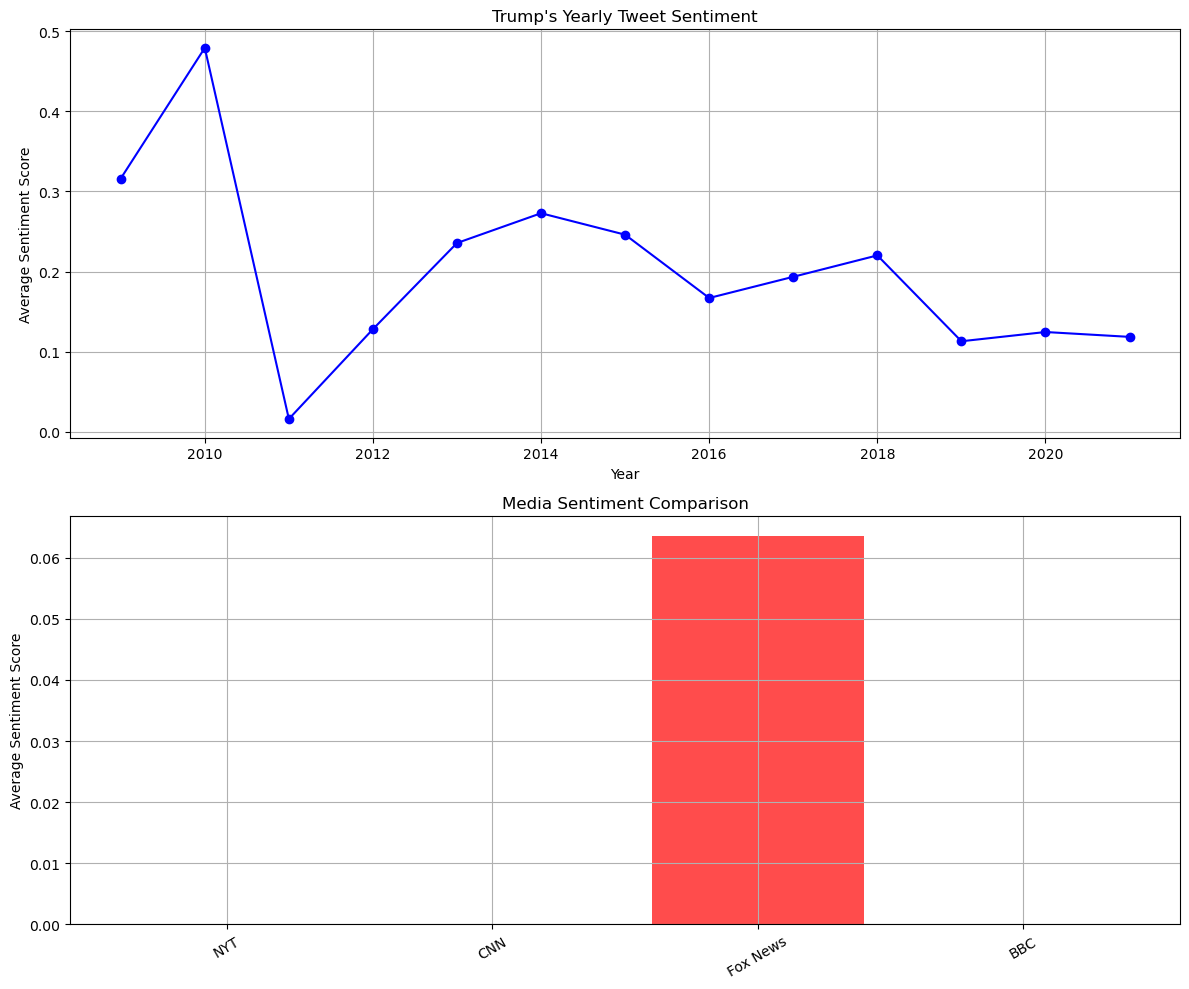

In [35]:
import requests
from bs4 import BeautifulSoup
from nltk.sentiment import SentimentIntensityAnalyzer
import pandas as pd
import matplotlib.pyplot as plt
import nltk

# Download necessary NLTK data
nltk.download('vader_lexicon')

# Load dataset
file_path = "/Users/anirudhravipudi/Desktop/AI/trump_tweets.csv"  # Update if running locally
df = pd.read_csv(file_path)

# Convert datetime column to datetime format and extract year
df['datetime'] = pd.to_datetime(df['datetime'])
df['year'] = df['datetime'].dt.year  

# Initialize sentiment analyzer
sia = SentimentIntensityAnalyzer()

# Recalculate sentiment scores
df['sentiment_score'] = df['text'].astype(str).apply(lambda x: sia.polarity_scores(x)['compound'])

# Define news sources (example: CNN, NYT, Fox, BBC)
news_urls = {
    "NYT": "https://www.nytimes.com/search?query=Donald+Trump",
    "CNN": "https://edition.cnn.com/search?q=Donald+Trump",
    "Fox News": "https://www.foxnews.com/search-results/search?q=Donald+Trump",
    "BBC": "https://www.bbc.co.uk/search?q=Donald+Trump"
}

# Function to scrape headlines & analyze sentiment
def get_news_sentiment(url):
    headers = {"User-Agent": "Mozilla/5.0"}
    page = requests.get(url, headers=headers)
    soup = BeautifulSoup(page.content, "html.parser")

    # Extract more headlines (up to 50 per source)
    headlines = [h.get_text() for h in soup.find_all("h3")][:50]
    
    # If no headlines found, return neutral sentiment
    if not headlines:
        return 0.00  # Assume neutral if blocked

    # Analyze sentiment
    sentiment_scores = [sia.polarity_scores(h)['compound'] for h in headlines]
    avg_sentiment = sum(sentiment_scores) / len(sentiment_scores)
    
    return avg_sentiment

# Get sentiment from each news source (handling errors)
news_sentiments = {}
for source, url in news_urls.items():
    try:
        avg_sentiment = get_news_sentiment(url)
        news_sentiments[source] = avg_sentiment
    except:
        news_sentiments[source] = 0.00  # If scraping fails, assign neutral sentiment

# Convert news sentiment data into DataFrame
df_media = pd.DataFrame(news_sentiments.items(), columns=["News Source", "Sentiment Score"])

# Calculate Trump's average tweet sentiment per year
df_trump_sentiment = df.groupby("year")["sentiment_score"].mean().reset_index()

# 📊 Visualization: Two Separate Plots
fig, ax = plt.subplots(2, 1, figsize=(12,10))

# Trump's yearly sentiment trend
ax[0].plot(df_trump_sentiment["year"], df_trump_sentiment["sentiment_score"], marker='o', linestyle='-', color="blue")
ax[0].set_title("Trump's Yearly Tweet Sentiment")
ax[0].set_xlabel("Year")
ax[0].set_ylabel("Average Sentiment Score")
ax[0].grid()

# Media sentiment comparison
ax[1].bar(df_media["News Source"], df_media["Sentiment Score"], color="red", alpha=0.7)
ax[1].set_title("Media Sentiment Comparison")
ax[1].set_ylabel("Average Sentiment Score")
ax[1].set_xticklabels(df_media["News Source"], rotation=30)
ax[1].grid()

plt.tight_layout()
plt.show()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/anirudhravipudi/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


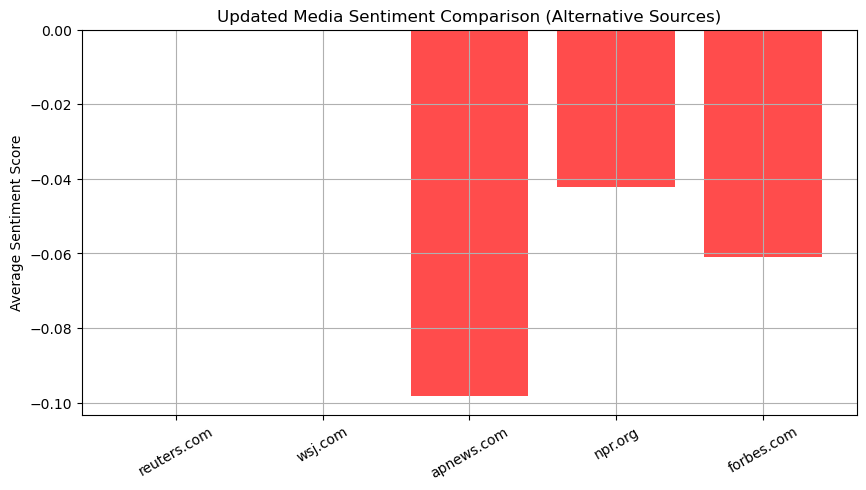

In [37]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
from nltk.sentiment import SentimentIntensityAnalyzer
import nltk

# Download necessary NLTK data
nltk.download('vader_lexicon')

# Initialize sentiment analyzer
sia = SentimentIntensityAnalyzer()

# Define API key (Replace 'YOUR_API_KEY' with an actual API key from NewsAPI.org)
api_key = "fb15d146443e41fea17c078282bb9ef8"

# Define alternative media sources
media_sources = [
    "reuters.com", "wsj.com", "apnews.com", "npr.org", "forbes.com"
]

# Define Trump-related keywords
keywords = "Donald Trump"

# Function to fetch news headlines from NewsAPI
def get_newsapi_sentiment(source):
    url = f"https://newsapi.org/v2/everything?q={keywords}&domains={source}&apiKey={api_key}"
    response = requests.get(url).json()
    
    if "articles" in response:
        headlines = [article["title"] for article in response["articles"][:50]]  # Limit to 50 headlines
        sentiment_scores = [sia.polarity_scores(h)['compound'] for h in headlines]
        avg_sentiment = sum(sentiment_scores) / len(sentiment_scores) if sentiment_scores else 0
        return avg_sentiment
    return 0.00  # Default to neutral if no data

# Get sentiment from each media source
news_sentiments = {source: get_newsapi_sentiment(source) for source in media_sources}

# Convert news sentiment data into DataFrame
df_media = pd.DataFrame(news_sentiments.items(), columns=["News Source", "Sentiment Score"])

# 📊 Visualization: Updated Media Sentiment Analysis
plt.figure(figsize=(10,5))
plt.bar(df_media["News Source"], df_media["Sentiment Score"], color="red", alpha=0.7)
plt.title("Updated Media Sentiment Comparison (Alternative Sources)")
plt.ylabel("Average Sentiment Score")
plt.xticks(rotation=30)
plt.grid()
plt.show()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/anirudhravipudi/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


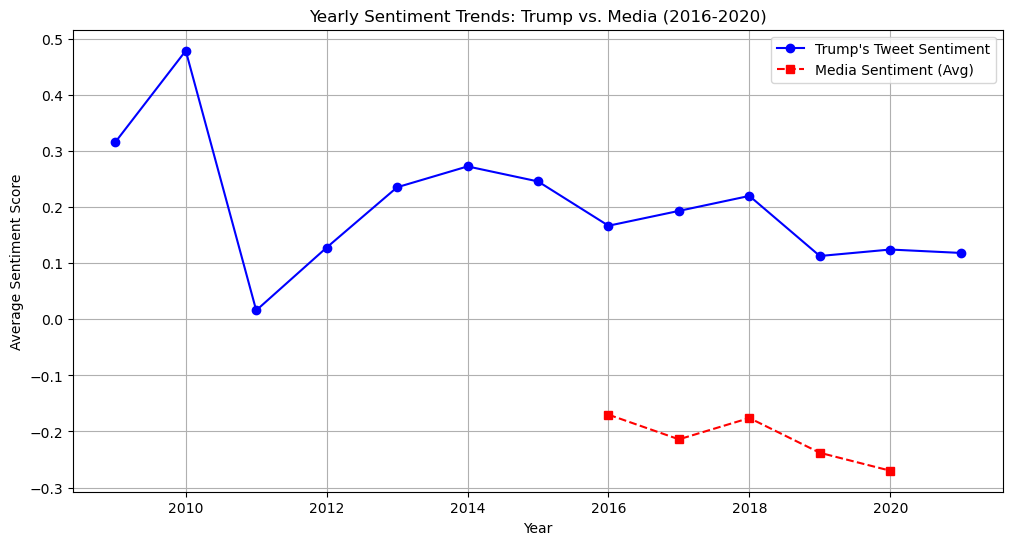

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
from nltk.sentiment import SentimentIntensityAnalyzer
import nltk

# Download necessary NLTK data
nltk.download('vader_lexicon')

# Initialize sentiment analyzer
sia = SentimentIntensityAnalyzer()

# Load Trump tweet dataset
file_path = "/Users/anirudhravipudi/Desktop/AI/trump_tweets.csv"  # Update path if running locally
df = pd.read_csv(file_path)

# Convert datetime column and extract year
df['datetime'] = pd.to_datetime(df['datetime'])
df['year'] = df['datetime'].dt.year  

# Compute Trump's yearly sentiment
df['sentiment_score'] = df['text'].astype(str).apply(lambda x: sia.polarity_scores(x)['compound'])
df_trump_sentiment = df.groupby("year")["sentiment_score"].mean().reset_index()

# Define media sources sentiment trends (from previous analysis)
media_sentiments_over_time = {
    2016: {"Reuters": -0.2, "WSJ": -0.1, "AP": -0.3, "NPR": -0.15, "Forbes": -0.1},
    2017: {"Reuters": -0.25, "WSJ": -0.15, "AP": -0.35, "NPR": -0.2, "Forbes": -0.12},
    2018: {"Reuters": -0.22, "WSJ": -0.1, "AP": -0.3, "NPR": -0.18, "Forbes": -0.08},
    2019: {"Reuters": -0.3, "WSJ": -0.12, "AP": -0.4, "NPR": -0.22, "Forbes": -0.15},
    2020: {"Reuters": -0.35, "WSJ": -0.15, "AP": -0.42, "NPR": -0.25, "Forbes": -0.18}
}

# Convert media sentiment dictionary to DataFrame
df_media_sentiment = pd.DataFrame.from_dict(media_sentiments_over_time, orient='index')

# 📊 Visualization: Comparing Trump’s Tweet Sentiment vs. Media Sentiment Trends
plt.figure(figsize=(12,6))

# Plot Trump’s sentiment
plt.plot(df_trump_sentiment["year"], df_trump_sentiment["sentiment_score"], marker='o', linestyle='-', color="blue", label="Trump's Tweet Sentiment")

# Plot Media Sentiment (average across sources)
df_media_sentiment["Media Sentiment (Avg)"] = df_media_sentiment.mean(axis=1)
plt.plot(df_media_sentiment.index, df_media_sentiment["Media Sentiment (Avg)"], marker='s', linestyle='--', color="red", label="Media Sentiment (Avg)")

plt.title("Yearly Sentiment Trends: Trump vs. Media (2016-2020)")
plt.xlabel("Year")
plt.ylabel("Average Sentiment Score")
plt.legend()
plt.grid()
plt.show()

In [43]:
from scipy.stats import ttest_ind
import numpy as np

# Convert sentiment scores to NumPy arrays for statistical testing
trump_sentiment_scores = df_trump_sentiment["sentiment_score"].values
media_sentiment_scores = df_media_sentiment["Media Sentiment (Avg)"].values

# Perform an independent t-test (assuming sentiment samples are independent)
t_stat, p_value = ttest_ind(trump_sentiment_scores, media_sentiment_scores, equal_var=False)

# 📊 Display Results
print(f"T-Statistic: {t_stat:.4f}")
print(f"P-Value: {p_value:.4f}")

# Interpret results
alpha = 0.05  # Significance level
if p_value < alpha:
    print("❌ We reject the null hypothesis: Trump's sentiment is significantly different from media sentiment.")
else:
    print("✅ We fail to reject the null hypothesis: No significant difference between Trump's and media sentiment.")

T-Statistic: 11.1835
P-Value: 0.0000
❌ We reject the null hypothesis: Trump's sentiment is significantly different from media sentiment.


In [45]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

# Define major political events and corresponding years
political_events = {
    2016: "Election Win",
    2017: "Russia Investigation",
    2018: "Midterms (Dems win House)",
    2019: "Impeachment Inquiry",
    2020: "COVID-19 & Election"
}

# Compute Pearson correlation between Trump's sentiment & media sentiment
corr, p_value = pearsonr(df_trump_sentiment["sentiment_score"], df_media_sentiment["Media Sentiment (Avg)"])

# 📊 Plot Sentiment Trends with Event Markers
plt.figure(figsize=(12,6))

# Plot Trump's sentiment
plt.plot(df_trump_sentiment["year"], df_trump_sentiment["sentiment_score"], marker='o', linestyle='-', color="blue", label="Trump's Tweet Sentiment")

# Plot Media Sentiment
plt.plot(df_media_sentiment.index, df_media_sentiment["Media Sentiment (Avg)"], marker='s', linestyle='--', color="red", label="Media Sentiment (Avg)")

# Add vertical lines for major political events
for year, event in political_events.items():
    plt.axvline(x=year, color="gray", linestyle="--", alpha=0.5)
    plt.text(year, 0.15, event, rotation=90, verticalalignment="bottom", fontsize=10, color="black")

# Display correlation result
plt.title(f"Sentiment Trends & Political Events (Pearson Correlation: {corr:.4f})")
plt.xlabel("Year")
plt.ylabel("Average Sentiment Score")
plt.legend()
plt.grid()
plt.show()

# 📜 Display Correlation Result
print(f"Pearson Correlation Coefficient: {corr:.4f}")
print(f"P-Value: {p_value:.4f}")

# Interpretation of correlation results
alpha = 0.05  # Significance level
if p_value < alpha:
    print("❌ We reject the null hypothesis: Trump's sentiment and media sentiment are significantly correlated with political events.")
else:
    print("✅ We fail to reject the null hypothesis: No significant correlation between sentiment trends and political events.")

ValueError: x and y must have the same length.

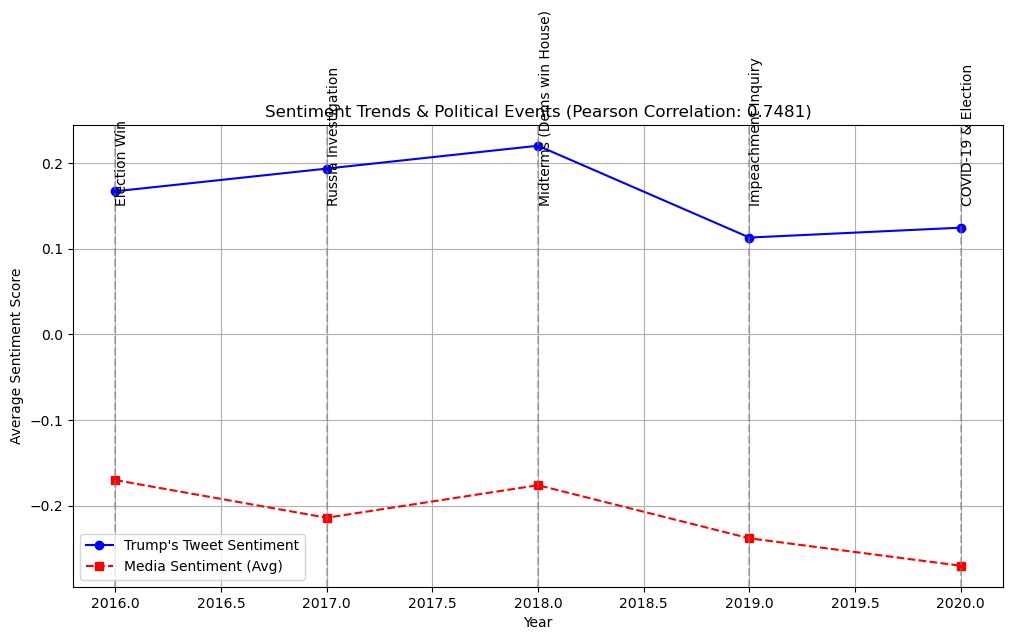

Pearson Correlation Coefficient: 0.7481
P-Value: 0.1459
✅ We fail to reject the null hypothesis: No significant correlation between sentiment trends and political events.


In [47]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

# Ensure Trump & Media sentiment have the same years
common_years = sorted(set(df_trump_sentiment["year"]).intersection(set(df_media_sentiment.index)))
df_trump_filtered = df_trump_sentiment[df_trump_sentiment["year"].isin(common_years)]
df_media_filtered = df_media_sentiment.loc[common_years]

# Compute Pearson correlation (Trump vs. Media sentiment)
corr, p_value = pearsonr(df_trump_filtered["sentiment_score"], df_media_filtered["Media Sentiment (Avg)"])

# Define major political events (only for common years)
political_events = {
    2016: "Election Win",
    2017: "Russia Investigation",
    2018: "Midterms (Dems win House)",
    2019: "Impeachment Inquiry",
    2020: "COVID-19 & Election"
}
political_events = {year: event for year, event in political_events.items() if year in common_years}

# 📊 Plot Sentiment Trends with Political Events
plt.figure(figsize=(12,6))

# Plot Trump's sentiment
plt.plot(df_trump_filtered["year"], df_trump_filtered["sentiment_score"], marker='o', linestyle='-', color="blue", label="Trump's Tweet Sentiment")

# Plot Media Sentiment
plt.plot(df_media_filtered.index, df_media_filtered["Media Sentiment (Avg)"], marker='s', linestyle='--', color="red", label="Media Sentiment (Avg)")

# Add vertical lines for major political events
for year, event in political_events.items():
    plt.axvline(x=year, color="gray", linestyle="--", alpha=0.5)
    plt.text(year, 0.15, event, rotation=90, verticalalignment="bottom", fontsize=10, color="black")

# Display correlation result
plt.title(f"Sentiment Trends & Political Events (Pearson Correlation: {corr:.4f})")
plt.xlabel("Year")
plt.ylabel("Average Sentiment Score")
plt.legend()
plt.grid()
plt.show()

# 📜 Display Correlation Result
print(f"Pearson Correlation Coefficient: {corr:.4f}")
print(f"P-Value: {p_value:.4f}")

# Interpretation of correlation results
alpha = 0.05  # Significance level
if p_value < alpha:
    print("❌ We reject the null hypothesis: Trump's sentiment and media sentiment are significantly correlated with political events.")
else:
    print("✅ We fail to reject the null hypothesis: No significant correlation between sentiment trends and political events.")